In [126]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%config InlineBackend.figure_formats = {'png', 'retina'}

In [127]:
folder_names = ['merosu', 'ningenisu']  # フォルダ名を指定

## 埋め込みをロードしてTSNEで次元削減

In [128]:
num_of_sentence = []
concat_embeddings = np.empty((0, 1536))

for folder_name in folder_names:
    with open(f'embeddings/{folder_name}/embeddings.pickle', 'rb') as f:
        embeddings = pickle.load(f)
        num_of_sentence.append(embeddings.shape[0])
        concat_embeddings = np.concatenate([concat_embeddings, embeddings])

concat_tsne = TSNE(n_components=2).fit_transform(concat_embeddings)

## プロット

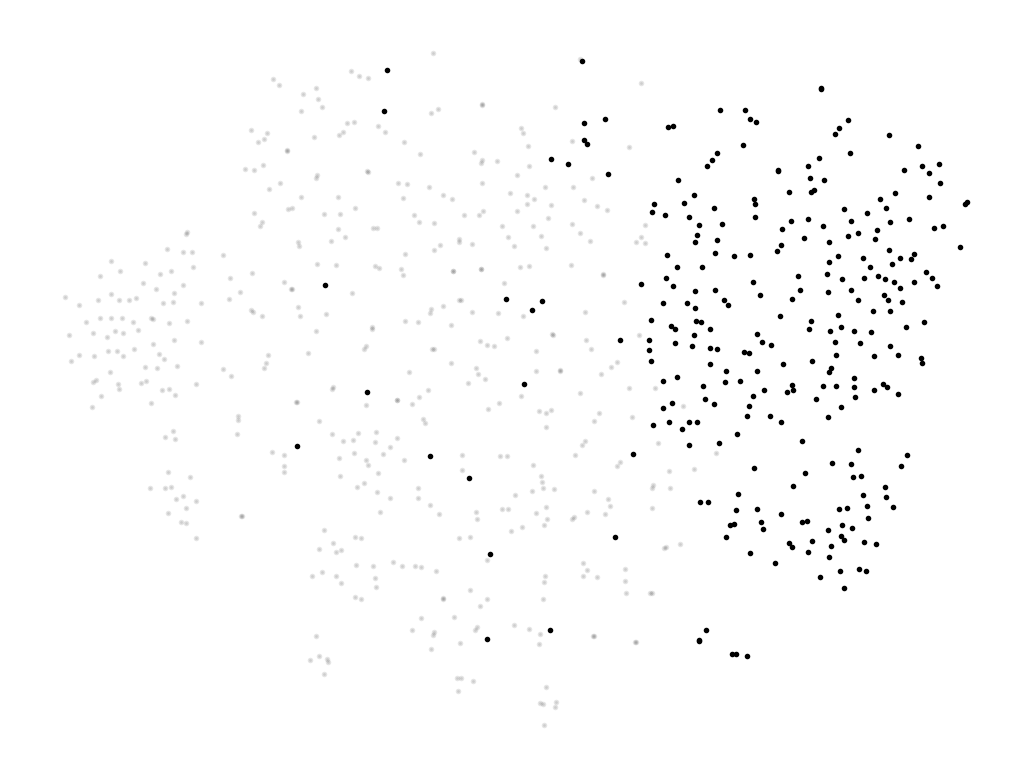

In [133]:
alphas = np.linspace(0.1, 1, len(num_of_sentence))

fig, ax = plt.subplots()
ax.axis('off')

for i in range(0, len(num_of_sentence)):
    if i == 0:
        ax.scatter(concat_tsne[:num_of_sentence[i], 0], concat_tsne[:num_of_sentence[i], 1], c='black', alpha=alphas[i], s=1)
    elif i == len(num_of_sentence) - 1:
        ax.scatter(concat_tsne[num_of_sentence[i-1]:, 0], concat_tsne[num_of_sentence[i-1]:, 1], c='black', alpha=alphas[i], s=1)
    else:
        ax.scatter(concat_tsne[num_of_sentence[i-1]:num_of_sentence[i], 0], concat_tsne[num_of_sentence[i-1]:num_of_sentence[i], 1], c='black', alpha=alphas[i], s=1)